<a href="https://colab.research.google.com/github/urvesh2012/MLTSA25_UBhagat/blob/main/labs/MLTSA_WK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
np.random.seed(77)
mydish=np.random.randn(100)

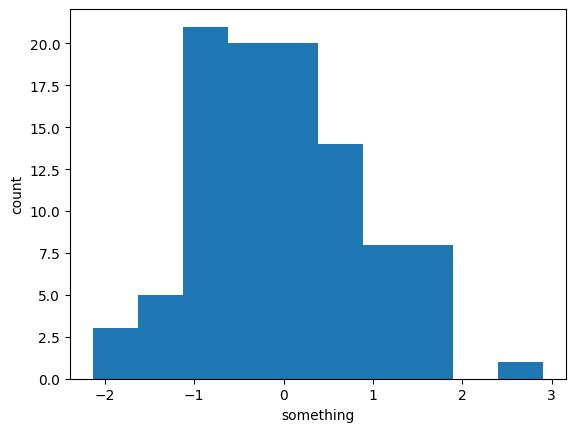

In [3]:
plt.hist(mydish)
plt.xlabel("something")
plt.ylabel("count")
plt.show()

In [4]:
url="https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/grb050525A.csv"
grbAG=pd.read_csv(url)
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0
...,...,...,...,...,...
114,W1,63738,NaN,21.20,1
115,M2,74798,NaN,21.59,1
116,U,128928,NaN,20.05,1
117,V,971360,NaN,22.09,1


In [5]:
grbAG.columns

Index(['filter', 'time', 'mag', 'magerr', 'upperlimit'], dtype='object')

In [6]:
grbAG[['time', 'mag', 'magerr', 'upperlimit']].corr()

,time,mag,magerr,upperlimit
time,1.000000,0.846971,0.517663,0.506833
mag,0.846971,1.000000,0.602576,NaN
magerr,0.517663,0.602576,1.000000,0.999288
upperlimit,0.506833,NaN,0.999288,1.000000


<Axes: xlabel='time', ylabel='mag'>

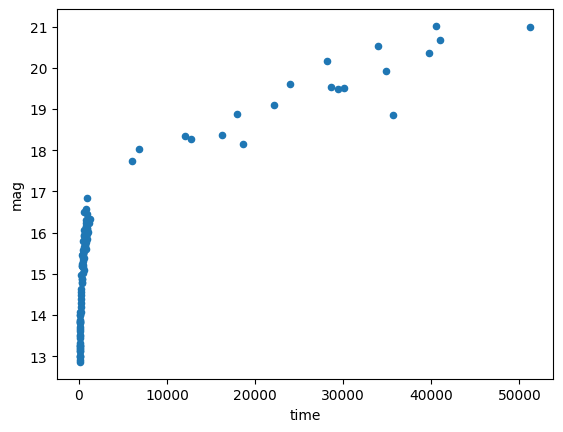

In [7]:
grbAG.plot(x="time",y="mag",kind="scatter")

In [8]:
grbAG['logtime']=np.log10(grbAG.loc[:,'time'])

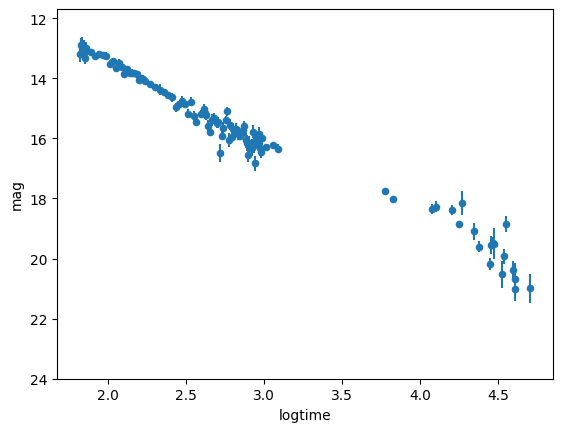

In [9]:
ax=grbAG.plot(x="logtime",y="mag",kind="scatter",yerr="magerr")
ax.set_ylim(24,11.7);

In [10]:
from sklearn.linear_model import LinearRegression

In [13]:
x=grbAG.loc[:,"logtime"].values
x

array([1.81954394, 1.8260748 , 1.83250891, 1.83884909, 1.84509804,
       1.85125835, 1.8573325 , 1.86332286, 1.8920946 , 1.91907809,
       1.94448267, 1.96848295, 1.99122608, 2.01283722, 2.03342376,
       2.05307844, 2.07188201, 2.08990511, 2.10720997, 2.12385164,
       2.13987909, 2.15533604, 2.17026172, 2.18469143, 2.19865709,
       2.2121876 , 2.22530928, 2.2380461 , 2.27184161, 2.30535137,
       2.33243846, 2.35983548, 2.38916608, 2.41161971, 2.4345689 ,
       2.45636603, 2.47567119, 2.49554434, 2.5171959 , 2.53402611,
       2.55145   , 2.56820172, 2.59879051, 2.61595005, 2.62221402,
       2.6294096 , 2.64345268, 2.6580114 , 2.67024585, 2.68304704,
       2.69722934, 2.7084209 , 2.7201593 , 2.73158877, 2.74193908,
       2.75663611, 2.76492298, 2.77451697, 2.78461729, 2.79518459,
       2.80413943, 2.81358099, 2.82347423, 2.83250891, 2.84135947,
       2.85003326, 2.85793526, 2.86628734, 2.87563994, 2.88309336,
       2.8909796 , 2.89872518, 2.90579588, 2.91381385, 2.92168

In [14]:
y=grbAG["mag"].values
y

array([13.21      , 12.9       , 12.86      , 13.01      , 12.97      ,
       13.31      , 13.13      , 13.01      , 13.13      , 13.26      ,
       13.18      , 13.24      , 13.25      , 13.51      , 13.44      ,
       13.67      , 13.48      , 13.62      , 13.86      , 13.7       ,
       13.83      , 13.81      , 13.84      , 13.87      , 14.06      ,
       14.        , 14.01      , 14.08      , 14.18903433, 14.29714678,
       14.38453778, 14.47292871, 14.56755795, 14.64      , 14.96903433,
       14.86714678, 14.76453778, 14.87292871, 15.17755795, 14.79      ,
       15.24903433, 15.45714678, 15.19292871, 15.00755795, 15.15453778,
       15.22      , 15.58903433, 15.78714678, 15.39453778, 15.31292871,
       15.47755795, 15.47      , 16.48903433, 15.90714678, 15.65453778,
       15.38292871, 15.09755795, 16.06      , 15.54903433, 15.94714678,
       15.69453778, 15.81292871, 15.67755795, 15.83      , 15.82903433,
       15.90714678, 15.82453778, 15.71292871, 15.59755795, 16.06

In [15]:
y.shape

(119,)

In [16]:
x.shape

(119,)

In [19]:
grbAG.isna().sum()

,0
filter,0
time,0
mag,11
magerr,0
upperlimit,0
logtime,0


In [21]:
grbAG_nonan=grbAG.dropna()
#grbAg.dropna(inplace=True)

In [22]:
x=grbAG_nonan.loc[:,"logtime"].values
y=grbAG_nonan.loc[:,"mag"].values

In [26]:
X=np.c_[np.ones((len(grbAG_nonan),1)), x]
X.shape

(108, 2)

In [30]:
lr=LinearRegression(fit_intercept=True)
lr.fit(X,y)
lr.coef_

array([0.        , 2.51199984])

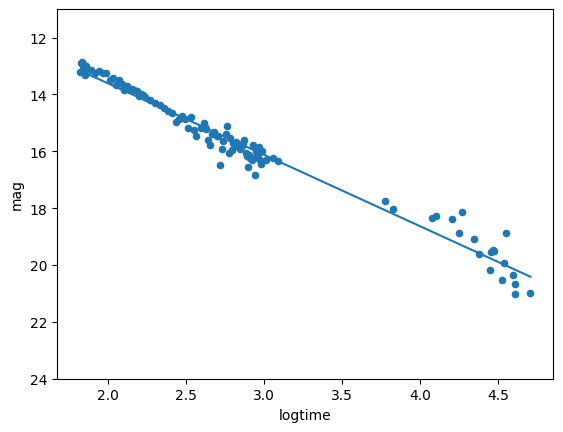

In [35]:
from matplotlib import pylab as plt
ax=grbAG_nonan.plot(x="logtime",y="mag",kind="scatter")
ax.set_ylim(24,11)
x_range=[[1,grbAG_nonan["logtime"].min()], [1,grbAG_nonan["logtime"].max()]]
ax.plot(x,lr.predict(X))

In [38]:
# prompt: read data from https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv in panda dataframe

import pandas as pd

url = "https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv"
consumption_df = pd.read_csv(url)
consumption_df


,year,income,consumption,production,unemployment,savings
0,1970.00,1.026164,0.515488,-2.301594,-24.013389,-12.860000
1,1970.25,1.321423,0.667464,-0.971319,-25.716675,-12.707256
2,1970.50,1.165145,0.102766,-0.392985,-25.743479,-12.752851
3,1970.75,0.502112,-0.132854,-2.179090,-25.396463,-13.277377
4,1971.00,1.880158,1.563505,0.976772,-28.159259,-13.033525
...,...,...,...,...,...,...
181,2015.25,0.742163,0.651337,-0.464605,-28.634280,-12.920307
182,2015.50,0.808291,0.607343,0.128754,-29.523084,-12.973597
183,2015.75,0.697304,0.508611,-0.628269,-28.408732,-12.956514
184,2016.00,0.479744,0.427022,-0.382036,-28.118906,-13.123471


In [39]:
consumption_df.describe()

,year,income,consumption,production,unemployment,savings
count,186.00000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,1993.12500,0.669221,0.713143,0.506816,-28.143260,-13.225574
std,13.45943,0.763883,0.582033,1.441115,1.663795,1.005263
min,1970.00000,-3.320112,-2.037942,-6.551892,-32.354818,-18.113481
25%,1981.56250,0.343154,0.397572,0.120717,-29.066742,-13.617136
50%,1993.12500,0.696175,0.761837,0.694020,-28.478698,-13.171509
75%,2004.68750,1.040326,1.062793,1.311983,-27.561412,-12.788312
max,2016.25000,3.212159,2.027060,3.617150,-21.518999,-9.705503


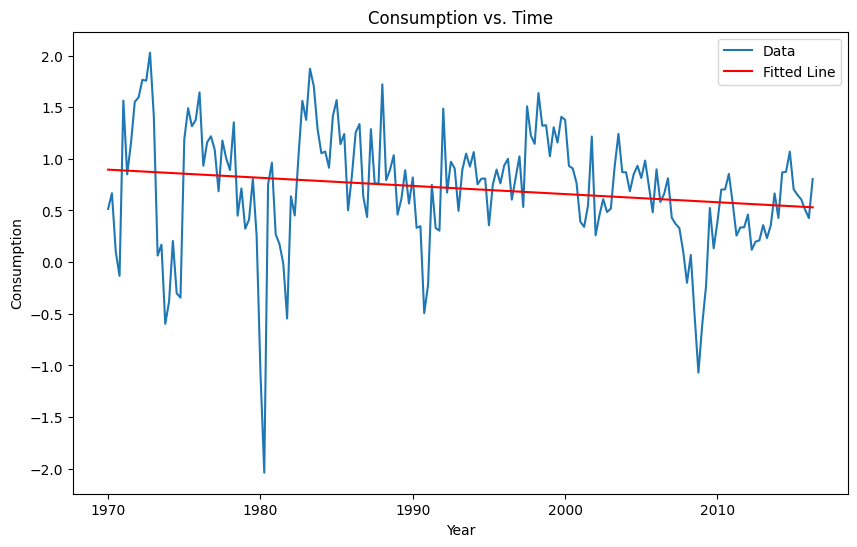

In [42]:
# prompt: using dataframe consumption_df fit a line to consumption vs time with sklearn and plot the result including fitting the intercept and plot line chart

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming consumption_df is already loaded as in the provided code

# Prepare the data
x = consumption_df['year'].values.reshape(-1, 1)  # Reshape x to be a 2D array
y = consumption_df['consumption'].values

# Fit the linear regression model with intercept
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Predict values for the fitted line
y_pred = model.predict(x)

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Consumption vs. Time')
plt.legend()

# Display the plot
plt.show()


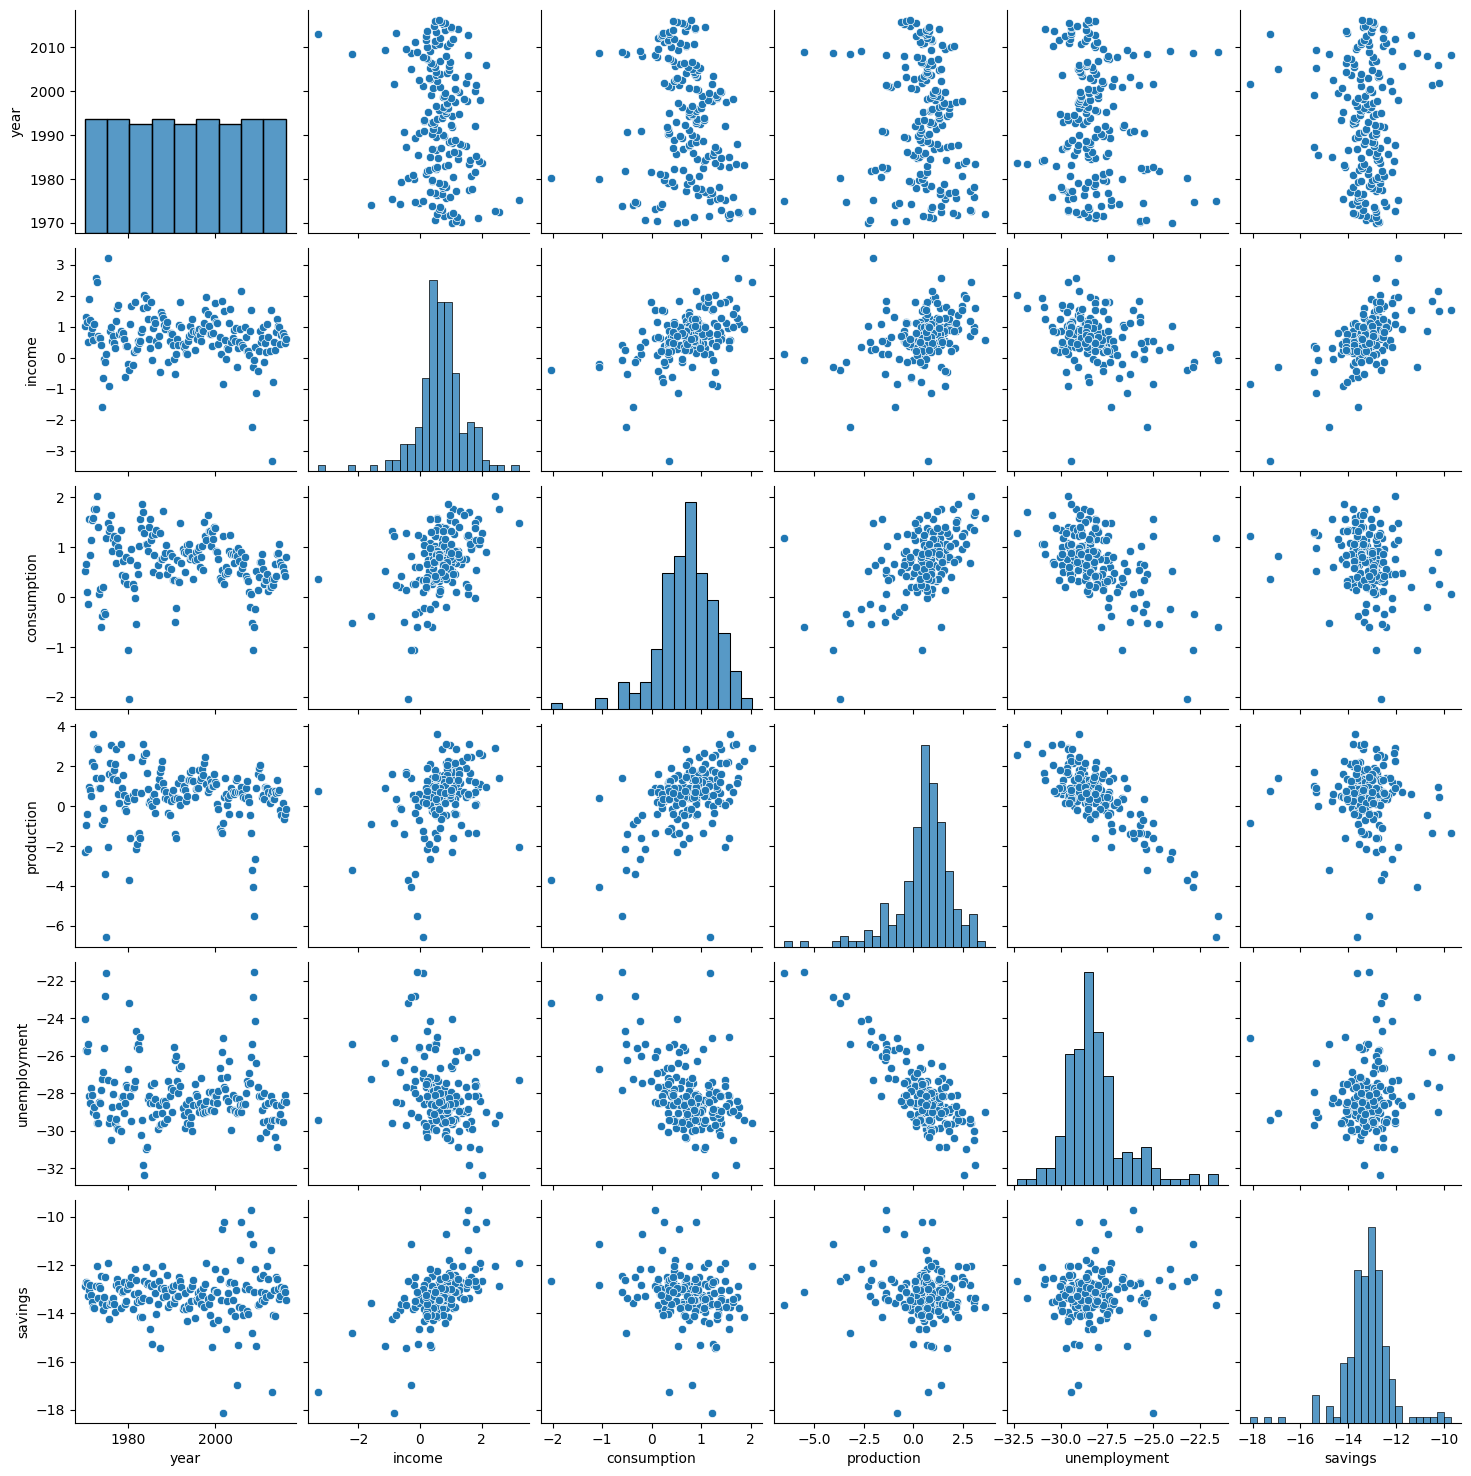

In [44]:
# prompt: show the correlation of all variable with one another with a pair plot

import seaborn as sns
sns.pairplot(consumption_df)


In [47]:
# prompt: using the datafram consumption_df fit a line to consumption vs production with sklearn include fitting the intercept and plot the result and show the sum of the square error

import numpy as np
# Calculate the sum of squared errors
sse = np.sum((y - y_pred) ** 2)
print(f"Sum of Squared Errors: {sse}")


Sum of Squared Errors: 45.81031215255513


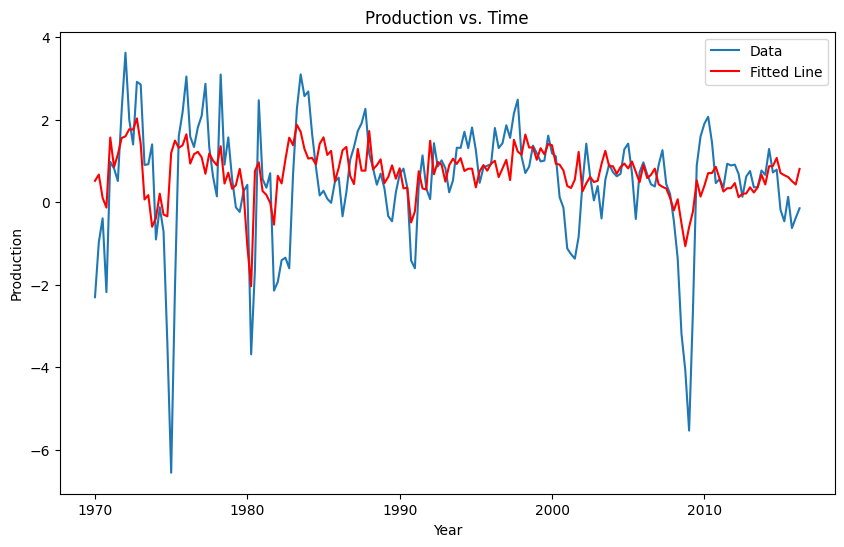

Sum of Squared Errors: 382.82433960523474


In [50]:
# prompt: using the datafram consumption_df fit a line to consumption vs production with sklearn include fitting the intercept and plot the result and show the sum of the square error

import matplotlib.pyplot as plt
import numpy as np
# Assuming consumption_df is already loaded as in the provided code

# Prepare the data
x = consumption_df['year'].values.reshape(-1, 1)  # Reshape x to be a 2D array
y = consumption_df['production'].values # Use 'production' instead of 'consumption'

# Fit the linear regression model with intercept
model = LinearRegression(fit_intercept=True)
model.fit(x, y)

# Predict values for the fitted line
y_pred = model.predict(x)

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Data') # Plot as points
plt.plot(x, consumption_df['consumption'].values, color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Production') # Changed label to 'Production'
plt.title('Production vs. Time')
plt.legend()

# Display the plot
plt.show()

# Calculate the sum of squared errors
sse = np.sum((y - y_pred) ** 2)
print(f"Sum of Squared Errors: {sse}")


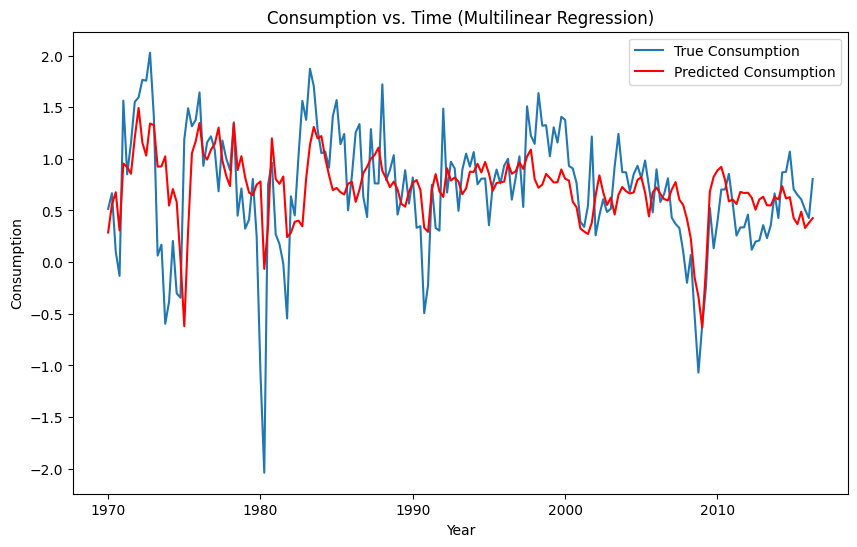

Sum of Squared Errors: 44.37202092902402


In [51]:
# prompt: fit a multilinear model  with sklearn to consumption_df predicting consumption and plot the true value of consumption and the prediction over time, also show the sum of sqaured errors

import matplotlib.pyplot as plt
import numpy as np
# Assuming consumption_df is already loaded as in the provided code

# Prepare the data
X = consumption_df[['year', 'production']].values # Use both 'year' and 'production'
y = consumption_df['consumption'].values

# Fit the multilinear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values for the fitted line
y_pred = model.predict(X)

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(consumption_df['year'], y, label='True Consumption')
plt.plot(consumption_df['year'], y_pred, color='red', label='Predicted Consumption')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Consumption vs. Time (Multilinear Regression)')
plt.legend()

# Display the plot
plt.show()

# Calculate the sum of squared errors
sse = np.sum((y - y_pred) ** 2)
print(f"Sum of Squared Errors: {sse}")
